In [ ]:
import os
import shutil
from pathlib import Path

# 1. Install & Setup
print("⚙️ Installing libraries...")
!pip install ultralytics kaggle -q

# Setup Kaggle Key
kaggle_dir = Path('/root/.kaggle')
kaggle_dir.mkdir(parents=True, exist_ok=True)
if Path('/content/kaggle.json').exists():
    shutil.move('/content/kaggle.json', kaggle_dir / 'kaggle.json')
    os.chmod(kaggle_dir / 'kaggle.json', 0o600)

# 2. Download ZIP ONLY (Saves RAM)
print("⬇️ Downloading ZIP file to disk (Safe Mode)...")
# We use the CLI because it streams directly to disk
!kaggle datasets download -d redzapdos123/dior-r-dataset-yolov11-obb-format --force

# 3. Unzip using System Tool (Fast & Low RAM)
print("📦 Unzipping... (This uses disk, not RAM)")
!unzip -q -o dior-r-dataset-yolov11-obb-format.zip -d datasets/DIOR

# 4. Cleanup & Fix Structure
print("🧹 Cleaning up...")
if Path('dior-r-dataset-yolov11-obb-format.zip').exists():
    os.remove('dior-r-dataset-yolov11-obb-format.zip') # Free up 7GB space

if Path('datasets/DIOR/YOLODIOR-R').exists():
    print("🔧 Fixing folder structure...")
    !mv datasets/DIOR/YOLODIOR-R/* datasets/DIOR/
    !rm -rf datasets/DIOR/YOLODIOR-R

print("✅ SUCCESS! Dataset is ready for training.")

⚙️ Installing libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.4 MB/s eta 0:00:00
⬇️ Downloading ZIP file to disk (Safe Mode)...
Dataset URL: https://www.kaggle.com/datasets/redzapdos123/dior-r-dataset-yolov11-obb-format
License(s): CC-BY-NC-SA-4.0
^C
📦 Unzipping... (This uses disk, not RAM)
unzip:  cannot find or open dior-r-dataset-yolov11-obb-format.zip, dior-r-dataset-yolov11-obb-format.zip.zip or dior-r-dataset-yolov11-obb-format.zip.ZIP.
🧹 Cleaning up...
✅ SUCCESS! Dataset is ready for training.


In [ ]:
import os

# 1. Make the directory where Kaggle expects the token
!mkdir -p ~/.kaggle

# 2. Copy your uploaded file to that directory
!cp kaggle.json ~/.kaggle/

# 3. Change permissions (security requirement for Kaggle)
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Kaggle token moved and permissions set successfully!")

✅ Kaggle token moved and permissions set successfully!


In [ ]:
import os

# Create the hidden directory
!mkdir -p ~/.kaggle

# Move your uploaded file there
!cp /content/kaggle.json ~/.kaggle/

# Give it the necessary privacy permissions
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Key setup complete! You can now download.")

✅ Key setup complete! You can now download.


In [ ]:
# Download the specific YOLOv11-OBB formatted dataset you found
!kaggle datasets download -d redzapdos123/dior-r-dataset-yolov11-obb-format --unzip -p /content/datasets/DIOR

print("✅ Correct YOLOv11 Dataset Downloaded!")

Dataset URL: https://www.kaggle.com/datasets/redzapdos123/dior-r-dataset-yolov11-obb-format
License(s): CC-BY-NC-SA-4.0
^C
✅ Correct YOLOv11 Dataset Downloaded!


In [ ]:
# 1. Install the YOLO library (if not already installed)
%pip install ultralytics

import os
from glob import glob
from ultralytics import YOLO

# 2. Automatically find the data.yaml file
yaml_files = glob("/content/datasets/DIOR/**/data.yaml", recursive=True)

if yaml_files:
    yaml_path = yaml_files[0]
    print(f"\n✅ SUCCESS: Found config file at: {yaml_path}")
    print("⬇️ Run the training cell below using this path.")
else:
    print("❌ Error: Could not find 'data.yaml'. Please check the folder structure.")

❌ Error: Could not find 'data.yaml'. Please check the folder structure.


In [ ]:
# Download the dataset again
# ⚠️ DO NOT PRESS THE STOP BUTTON. IT USES GOOGLE'S INTERNET, NOT YOURS.
!kaggle datasets download -d redzapdos123/dior-r-dataset-yolov11-obb-format --unzip -p /content/datasets/DIOR

import os
if os.path.exists("/content/datasets/DIOR"):
    print("\n✅ SUCCESS: Dataset is ready!")
else:
    print("\n❌ FAILED: The download was stopped.")

Dataset URL: https://www.kaggle.com/datasets/redzapdos123/dior-r-dataset-yolov11-obb-format
License(s): CC-BY-NC-SA-4.0
^C

❌ FAILED: The download was stopped.


In [ ]:
import kagglehub
import shutil
import os

# 1. Clean up any broken files from previous attempts
print("🧹 Cleaning up old failed attempts...")
if os.path.exists("/content/datasets/DIOR"):
    shutil.rmtree("/content/datasets/DIOR")

# 2. Download using the Python Library (More stable than command line)
print("⬇️ Starting robust download... (Please wait, this handles large files better)")
path = kagglehub.dataset_download("redzapdos123/dior-r-dataset-yolov11-obb-format")

print(f"✅ Download finished at hidden path: {path}")

# 3. Move the files to the correct folder so your training code works
print("📦 Moving files to /content/datasets/DIOR...")
target_dir = "/content/datasets/DIOR"
shutil.copytree(path, target_dir)

print("\n🎉 SUCCESS! The dataset is finally ready.")
print("Files found:", len(os.listdir(target_dir)))

🧹 Cleaning up old failed attempts...
⬇️ Starting robust download... (Please wait, this handles large files better)


100%|██████████| 6.91G/6.91G [00:37<00:00, 198MB/s] 

Extracting files...


✅ Download finished at hidden path: /root/.cache/kagglehub/datasets/redzapdos123/dior-r-dataset-yolov11-obb-format/versions/2
📦 Moving files to /content/datasets/DIOR...

🎉 SUCCESS! The dataset is finally ready.
Files found: 1


In [ ]:
# 1. Install Ultralytics (YOLOv11)
%pip install ultralytics

import os
from glob import glob
from ultralytics import YOLO

# 2. Find the configuration file automatically
# We search recursively inside the DIOR folder
yaml_files = glob("/content/datasets/DIOR/**/data.yaml", recursive=True)

if yaml_files:
    yaml_path = yaml_files[0]
    print(f"\n✅ SUCCESS: Found config file at: {yaml_path}")
    print("⬇️ You are ready! Run the training cell below.")
else:
    print("❌ Error: Still can't find 'data.yaml'. Let me know if you see this.")


✅ SUCCESS: Found config file at: /content/datasets/DIOR/YOLODIOR-R/data.yaml
⬇️ You are ready! Run the training cell below.


In [ ]:
import os
import yaml

# 1. Define where your dataset lives
base_dir = "/content/datasets/DIOR/YOLODIOR-R"
yaml_path = os.path.join(base_dir, "data.yaml")

# 2. Detective Work: Find where the images really are
# We check if the 'val' folder has an 'images' subfolder or if images are direct
if os.path.exists(os.path.join(base_dir, "val", "images")):
    print("✅ Found standard structure: 'val/images'")
    train_dir = "train/images"
    val_dir = "val/images"
else:
    print("⚠️ Found flat structure: Images are directly in 'train' and 'val'")
    train_dir = "train"
    val_dir = "val"

# 3. Rewrite the data.yaml file with the correct Absolute Paths
with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)

print(f"🔧 Fixing {yaml_path}...")

# Force Absolute Path so YOLO never gets lost
config['path'] = base_dir
config['train'] = train_dir
config['val'] = val_dir
# Update test path if it exists
if 'test' in config:
    config['test'] = train_dir.replace("train", "test")

# Save the fixed file
with open(yaml_path, 'w') as f:
    yaml.dump(config, f)

print("✅ Config file updated successfully!")
print(f"   • Root: {config['path']}")
print(f"   • Train: {config['train']}")
print(f"   • Val:   {config['val']}")

✅ Found standard structure: 'val/images'
🔧 Fixing /content/datasets/DIOR/YOLODIOR-R/data.yaml...
✅ Config file updated successfully!
   • Root: /content/datasets/DIOR/YOLODIOR-R
   • Train: train/images
   • Val:   val/images


In [ ]:
from ultralytics import YOLO

# 1. Load the OBB model
model = YOLO("yolo11s-obb.pt")

# 2. Start Training
results = model.train(
    data="/content/datasets/DIOR/YOLODIOR-R/data.yaml",
    epochs=10,        # Keep it short for the first test
    imgsz=640,        # Reduced from 1024 to 640 (Saves HUGE memory)
    batch=8,          # Slightly higher batch size since images are smaller
    device=0,         # Use the T4 GPU
    name="dior_obb_run" # Names your results folder
)

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/DIOR/YOLODIOR-R/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dior_obb_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

In [ ]:
import shutil
from google.colab import files

# 1. Zip the folder containing your model weights
# The folder name 'dior_obb_run' comes from the name we gave it earlier
shutil.make_archive("/content/my_yolo_model", 'zip', "/content/runs/obb/dior_obb_run")

print("✅ Zipping complete! Download starting...")

# 2. Download the zip file to your computer automatically
files.download("/content/my_yolo_model.zip")

✅ Zipping complete! Download starting...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📷 Please upload a satellite image to test (jpg or png)...


Saving 1.-2_s020_sh0200_jedit01_flat_47478122812_o.jpg to 1.-2_s020_sh0200_jedit01_flat_47478122812_o (1).jpg

image 1/1 /content/1.-2_s020_sh0200_jedit01_flat_47478122812_o (1).jpg: 384x640 16 airplanes, 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


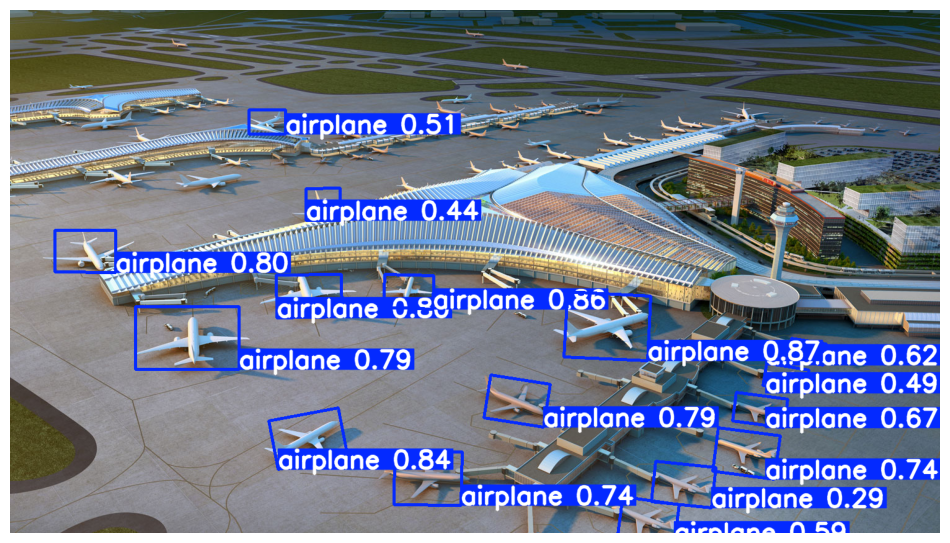

✅ Prediction complete for 1.-2_s020_sh0200_jedit01_flat_47478122812_o (1).jpg!


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import cv2
import numpy as np

# 1. Upload an image
print("📷 Please upload a satellite image to test (jpg or png)...")
uploaded = files.upload()

# 2. Process each uploaded image
for filename in uploaded.keys():
    # Run the model on the new image
    # conf=0.25 means it only shows boxes if it's 25% sure
    results = model.predict(filename, conf=0.25)

    # 3. Show the results
    for result in results:
        # Plot the image with boxes
        im_array = result.plot()  # improved plotting function from YOLOv11
        im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB) # Convert colors for display

        plt.figure(figsize=(12, 12))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.show()

        print(f"✅ Prediction complete for {filename}!")

In [ ]:
from ultralytics import YOLO
# Run this to resume
# Load your saved brain (Make sure you uploaded best.pt!)
model = YOLO("/content/best.pt")

# Continue Training
model.train(
    data="/content/datasets/DIOR/YOLODIOR-R/data.yaml",
    epochs=50,        # New target (e.g., if you did 10, this does 40 more)
    resume=True,      # ⚡ This is the magic word
    imgsz=640,
    batch=8,
    device=0,
    project="/content/runs/obb",
    name="dior_resume_run"
)

In [ ]:
# 1. Install FIRST (This must be the very first line)
%pip install ultralytics -q
%pip install kagglehub -q
# New Master Set-Up
import os
import shutil
import yaml
import kagglehub
from ultralytics import YOLO

# 2. Setup Keys
print("⚙️ Setting up environment...")
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3. Download Data
print("\n⬇️ Downloading Dataset...")
if os.path.exists("/content/datasets/DIOR"):
    shutil.rmtree("/content/datasets/DIOR")
path = kagglehub.dataset_download("redzapdos123/dior-r-dataset-yolov11-obb-format")
shutil.copytree(path, "/content/datasets/DIOR")

# 4. Fix Config Paths
print("\n🔧 Fixing Config...")
base_dir = "/content/datasets/DIOR/YOLODIOR-R"
yaml_path = os.path.join(base_dir, "data.yaml")

# Detect structure
if os.path.exists(os.path.join(base_dir, "val", "images")):
    train_dir, val_dir = "train/images", "val/images"
else:
    train_dir, val_dir = "train", "val"

# Rewrite yaml
with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)
config['path'] = base_dir
config['train'] = train_dir
config['val'] = val_dir
if 'test' in config: config['test'] = train_dir.replace("train", "test")

with open(yaml_path, 'w') as f:
    yaml.dump(config, f)

print("✅ READY TO TRAIN!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
⚙️ Setting up environment...

⬇️ Downloading Dataset...


100%|██████████| 6.91G/6.91G [01:19<00:00, 92.8MB/s]

Extracting files...



🔧 Fixing Config...
✅ READY TO TRAIN!


In [ ]:
from ultralytics import YOLO
# New Training From 11-20
# 1. Load your smart brain (It remembers the first 10 epochs)
model = YOLO("/content/best.pt")

# 2. Start "Round 2" of Training
model.train(
    data="/content/datasets/DIOR/YOLODIOR-R/data.yaml",
    epochs=10,       # Train for 10 NEW epochs (Total will be 20)
    imgsz=640,
    batch=8,
    device=0,
    project="/content/runs/obb",
    name="dior_round_2"  # New folder for the new results
)

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/DIOR/YOLODIOR-R/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dior_round_2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a53c9d49490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043

In [ ]:
import shutil
from google.colab import files
# To ZIP and Download
print("📦 Zipping your final model...")
# Zip the specific folder where the results are saved
shutil.make_archive("/content/FINAL_20_EPOCH_MODEL", 'zip', "/content/runs/obb/dior_round_2")

print("⬇️ Downloading...")
# Trigger the download
files.download("/content/FINAL_20_EPOCH_MODEL.zip")

📦 Zipping your final model...
⬇️ Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
# Training From Epoch 21 to 30
# 1. Load your 20-epoch brain (Make sure you uploaded the right one!)
model = YOLO("/content/best.pt")

# 2. Train for 10 MORE epochs (Round 3)
model.train(
    data="/content/datasets/DIOR/YOLODIOR-R/data.yaml",
    epochs=10,        # This adds 10 new epochs (Total logic = 30)
    imgsz=640,
    batch=8,
    device=0,
    project="/content/runs/obb",
    name="dior_round_3"  # New folder for the final round
)

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/DIOR/YOLODIOR-R/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dior_round_3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8426671850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043

In [ ]:
import shutil
from google.colab import files
# Zip and Download Epoch 30 Results
print("📦 Zipping your FINAL 30-Epoch Model...")
# Zip the Round 3 folder where the final results are
shutil.make_archive("/content/FINAL_30_EPOCH_MODEL", 'zip', "/content/runs/obb/dior_round_3")

print("⬇️ Downloading...")
# Download the zip file to your laptop
files.download("/content/FINAL_30_EPOCH_MODEL.zip")

📦 Zipping your FINAL 30-Epoch Model...
⬇️ Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
#Creating a Test Folder 1
# Create a folder for your images 1
folder_path = "/content/my_test_images"
os.makedirs(folder_path, exist_ok=True)

print(f"✅ Folder created at: {folder_path}")
print("👉 Go to Google Images, download 2-3 satellite photos (e.g., 'satellite view stadium', 'airport aerial view').")
print("👉 Drag and drop them into the 'my_test_images' folder in the sidebar on the left.")

✅ Folder created at: /content/my_test_images
👉 Go to Google Images, download 2-3 satellite photos (e.g., 'satellite view stadium', 'airport aerial view').
👉 Drag and drop them into the 'my_test_images' folder in the sidebar on the left.


In [ ]:
# Install YOLO
%pip install ultralytics -q
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import glob
import math
# Install The YOLO Model Only Not The DataSet
print("✅ Ready to Test!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Ready to Test!


In [ ]:
# Create the folder
folder_path = "/content/my_test_images"
os.makedirs(folder_path, exist_ok=True)
# Create Test Folder 2
print(f"📂 Folder created: {folder_path}")
print("👉 Now Drag and drop your test images (Airports, Ships, etc.) into this folder in the sidebar!")

📂 Folder created: /content/my_test_images
👉 Now Drag and drop your test images (Airports, Ships, etc.) into this folder in the sidebar!


In [ ]:
# 1. Install YOLO
%pip install ultralytics -q
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import glob
import math
# Start From Here (YOLO Instillation and Test Folder Creation)
# 2. Create the Test Folder
folder_path = "/content/my_test_images"
os.makedirs(folder_path, exist_ok=True)

print("✅ Setup Complete!")
print(f"📂 Folder created: {folder_path}")
print("👉 Now drag and drop your new test images into 'my_test_images' on the left!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Setup Complete!
📂 Folder created: /content/my_test_images
👉 Now drag and drop your new test images into 'my_test_images' on the left!


🧐 Debug Report: Found 5 images.
   -> Found: 00075.jpg
   -> Found: 00049.jpg
   -> Found: 00072.jpg
   -> Found: 00026.jpg
   -> Found: 00098.jpg
🚀 Analyzing 5 images...
Results saved to /content/runs/obb/predict3


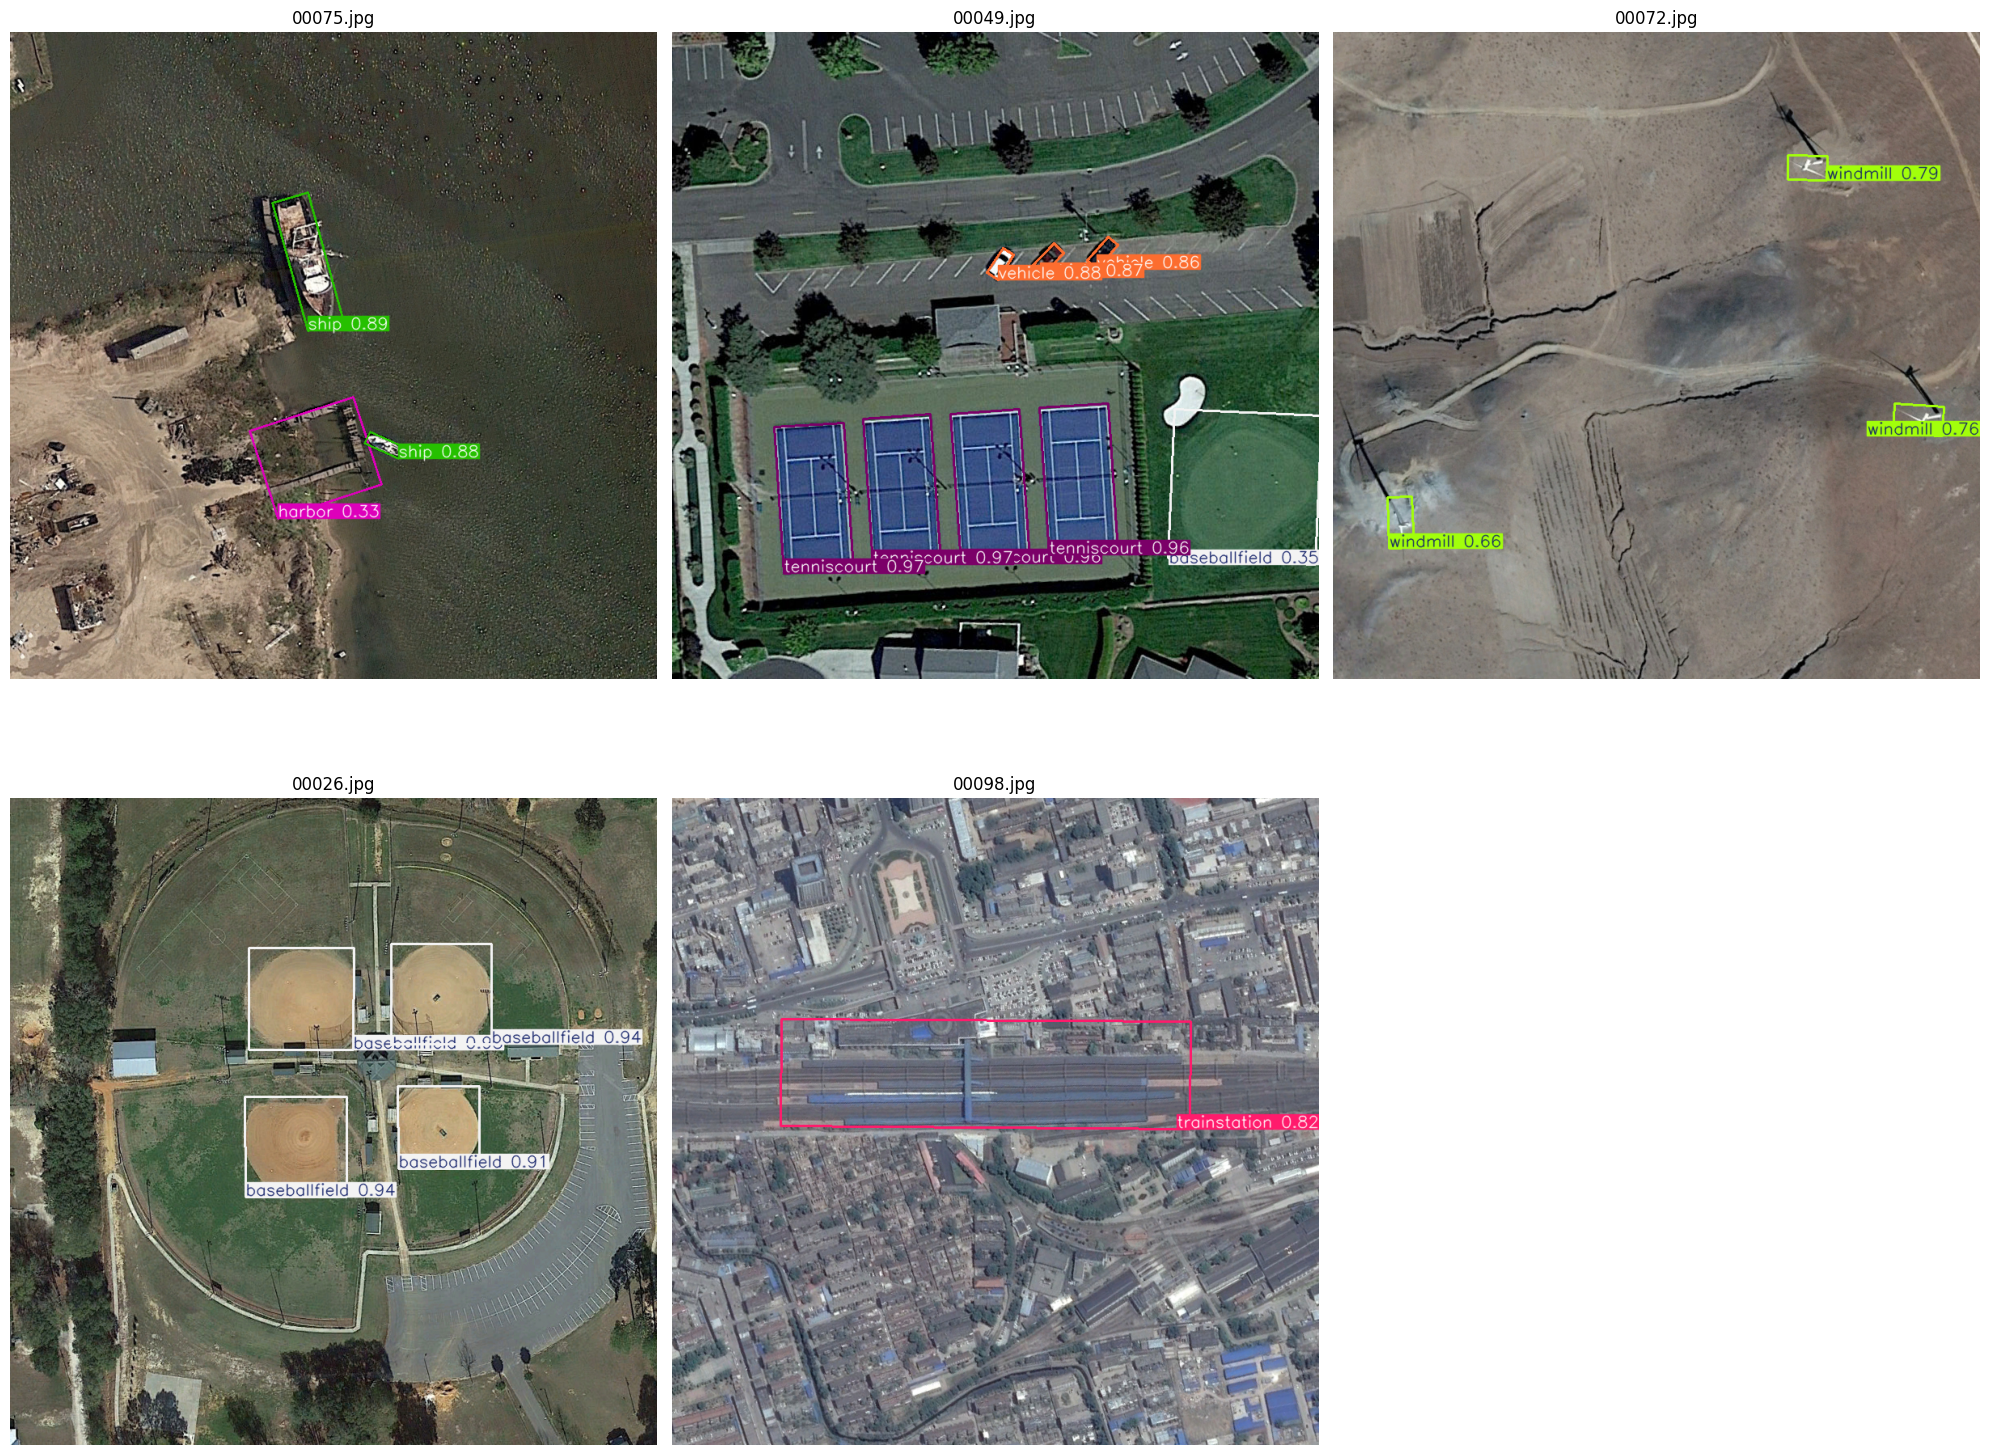

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import glob
import os
import math
# Test Images in Grid Pattern
# --- 1. LOAD MODEL ---
model_path = "/content/best.pt"
model = YOLO(model_path)

# --- 2. GET IMAGES (SMARTER WAY) ---
image_folder = "/content/my_test_images"

# We now look for ALL capitalizations
extensions = ['*.jpg', '*.JPG', '*.jpeg', '*.JPEG', '*.png', '*.PNG', '*.webp']
image_files = []

for ext in extensions:
    # Add files found for each extension pattern
    found = glob.glob(f"{image_folder}/{ext}")
    image_files.extend(found)

# --- DEBUG: TELL ME WHAT YOU FOUND ---
print(f"🧐 Debug Report: Found {len(image_files)} images.")
for f in image_files:
    print(f"   -> Found: {os.path.basename(f)}")

if len(image_files) == 0:
    print("❌ No images found! Check if they are actually in the 'my_test_images' folder.")
else:
    print(f"🚀 Analyzing {len(image_files)} images...")

    # --- 3. RUN PREDICTION ---
    results = model.predict(source=image_files, conf=0.25, save=True, verbose=False)

    # --- 4. DISPLAY AS GRID ---
    num_images = len(results)
    cols = 3  # Let's do 3 columns to fit them better
    rows = math.ceil(num_images / cols)

    plt.figure(figsize=(20, 8 * rows))

    for i, result in enumerate(results):
        im_array = result.plot()
        im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title(f"{os.path.basename(result.path)}", fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
from ultralytics import YOLO
import cv2
import glob
import os
# To Generate Individual Images
# --- 1. SETUP ---
model_path = "/content/best.pt"
image_folder = "/content/my_test_images"
output_folder = "/content/my_final_results" # <--- New folder for results

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

model = YOLO(model_path)

# --- 2. GET IMAGES ---
# Look for common extensions
extensions = ['*.jpg', '*.JPG', '*.jpeg', '*.JPEG', '*.png', '*.PNG']
image_files = []
for ext in extensions:
    image_files.extend(glob.glob(f"{image_folder}/{ext}"))

if len(image_files) == 0:
    print("❌ No images found! Please upload them to 'my_test_images'.")
else:
    print(f"🚀 Found {len(image_files)} images. Saving individual results...")

    # --- 3. PREDICT & SAVE INDIVIDUALLY ---
    results = model.predict(source=image_files, conf=0.25, save=False, verbose=False)

    for i, result in enumerate(results):
        # Generate the image with boxes drawn
        # conf=True shows the score, labels=True shows the class name
        im_array = result.plot(conf=True, labels=True)

        # Get original filename
        filename = os.path.basename(result.path)

        # Create a new filename (e.g., "result_stadium.jpg")
        save_path = os.path.join(output_folder, f"result_{filename}")

        # Save the image using OpenCV
        cv2.imwrite(save_path, im_array)
        print(f"✅ Saved: {save_path}")

print(f"\n🎉 Done! All {len(image_files)} images are saved in the '{output_folder}' folder on the left.")
print("👉 Right-click that folder and select 'Download' to get them all at once!")

🚀 Found 1 images. Saving individual results...
✅ Saved: /content/my_final_results/result_Drax_Power_Station.png

🎉 Done! All 1 images are saved in the '/content/my_final_results' folder on the left.
👉 Right-click that folder and select 'Download' to get them all at once!


In [ ]:
import shutil
import os
# To Zip Download The Individual Images
# 1. Zip the folder
# Format: shutil.make_archive(output_filename, 'zip', folder_to_zip)
shutil.make_archive("/content/final_results", 'zip', "/content/my_final_results")

print("✅ Zipping Complete!")
print("👉 Click the 'Folder' icon with the Refresh arrow in the sidebar.")
print("👉 Look for a new file called 'final_results.zip'.")
print("👉 Right-click 'final_results.zip' and select Download.")

✅ Zipping Complete!
👉 Click the 'Folder' icon with the Refresh arrow in the sidebar.
👉 Look for a new file called 'final_results.zip'.
👉 Right-click 'final_results.zip' and select Download.


In [ ]:
import os
import glob
import cv2
import shutil
from ultralytics import YOLO
# To Generate and ZIP Individual Images Through One Code
# --- STEP 1: SETUP ---
model_path = "/content/best.pt"
input_folder = "/content/my_test_images"   # Where your images are
output_folder = "/content/my_final_results" # Where results go

# Clean up previous runs to avoid mixing old/new results
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.makedirs(output_folder, exist_ok=True)

# Check if model and images exist
if not os.path.exists(model_path):
    print("❌ Error: 'best.pt' not found! Please upload it.")
else:
    # Find all images (jpg, png, jpeg, webp - case insensitive)
    extensions = ['*.jpg', '*.JPG', '*.jpeg', '*.JPEG', '*.png', '*.PNG', '*.webp']
    image_files = []
    for ext in extensions:
        image_files.extend(glob.glob(f"{input_folder}/{ext}"))

    if len(image_files) == 0:
        print("❌ No images found! Did you create 'my_test_images' and upload files?")
    else:
        print(f"🚀 Found {len(image_files)} images. Processing...")

        # --- STEP 2: GENERATE RESULTS ---
        model = YOLO(model_path)
        results = model.predict(source=image_files, conf=0.25, save=False, verbose=False)

        for result in results:
            im_array = result.plot(conf=True, labels=True)
            filename = os.path.basename(result.path)
            save_path = os.path.join(output_folder, f"result_{filename}")
            cv2.imwrite(save_path, im_array)

        print(f"✅ Generated {len(image_files)} result images.")

        # --- STEP 3: ZIP IT UP ---
        print("📦 Zipping folder...")
        shutil.make_archive("/content/final_results", 'zip', output_folder)

        print("\n🎉 DONE! SUCCESS!")
        print("👉 Go to the sidebar on the left.")
        print("👉 Click 'Refresh' (Folder icon with circular arrow).")
        print("👉 Right-click 'final_results.zip' and DOWNLOAD!")

🚀 Found 5 images. Processing...
✅ Generated 5 result images.
📦 Zipping folder...

🎉 DONE! SUCCESS!
👉 Go to the sidebar on the left.
👉 Click 'Refresh' (Folder icon with circular arrow).
👉 Right-click 'final_results.zip' and DOWNLOAD!


In [ ]:
import shutil
import os
# To delete all images from folder
folder_path = "/content/my_test_images"

# 1. Delete the folder and everything inside it
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)

# 2. Re-create the empty folder
os.makedirs(folder_path, exist_ok=True)

print("✅ Folder wiped clean!")
print(f"📂 You have a fresh folder at: {folder_path}")
print("👉 Now drag and drop your NEW 'Top-Down' satellite images here.")

✅ Folder wiped clean!
📂 You have a fresh folder at: /content/my_test_images
👉 Now drag and drop your NEW 'Top-Down' satellite images here.
